# **Análise do Sistema Nacional de Informações sobre Saneamento (SNIS)**
---


**Introdução**

A base original possui dados de 1995 a 2022, visto que 2022 possui algumas informações ausentes, para a análise dos últimos 5 anos optamos por considerar  o ano máximo da base como 2021.

**Justificativa**



**Perguntas Orientadoras**

1. Qual é a cobertura de acesso à água potável e esgotamento sanitário nos estados brasileiros nos últimos 5 anos?
2. Top 5 Estados de cobertura de água e Top 5 de cobertura de esgoto.
3. Variação de investimento público ao longo dos anos por estado
4. Qual a natureza jurídica mais recorrente de prestação desses serviços?
5. Tendência de natureza jurídica de instituições gestoras de serviços de água/esgoto nos últimos 5 anos
6. Como os indicadores de saneamento se correlacionam com índices de saúde (ex.: incidência de doenças)?


## **Leitura das bases**

O download de uma das bases necessárias para a análise está quebrado no site, logo, optamos por ler as bases direto da Base de Dados ao contrário de baixar o csv e carregar no ambiente. Por isso, utilizaremos a biblioteca base de dados (instalada anteriormente) e um ID de Projeto do BigQuery para realizar a conexão.

**Passos para configurar o projeto:**

*   Acesse o link: https://console.cloud.google.com/projectselector2/home/dashboard
*   Aceite o Termo de Serviços do Google Cloud
*   Clique em Create Project/Criar Projeto
*   Escolha um nome bacana para o seu projeto :)
*   Clique em Create/Criar

Veja que seu projeto tem um Nome e um Project ID - este segundo é a informação que você irá utilizar para fazer consultas no repositório público da Base de Dados.

**Atenção:** Não é necessário passar nenhuma informação de pagamento. O projeto só será cobrado caso ultrapasse sua cota de 1TB de processamento por mês. Mas acredite: é difícil atingir este limite.

Uma vez criado o projeto no Google Cloud, podemos rodar a consulta passando o nome do seu projeto (`project_id`) no parâmetro `billing_project_id` do comando anterior.

Para facilitar, criamos a variável `meuprojeto` e vamos reutilizá-la abaixo.

**Troque o texto entre as aspas (`MINHA_IDENTIFICACAO`) pela ID que você acabou de obter no GOogle Cloud**.

> **ATENÇÃO!!**
> **Não baixe a base completa por meio dessa conexão**, pois você poderá ser **cobrada** de forma desnecessária. **Utilize filtros** de linhas e selecione apenas as colunas que serão utilizadas na sua análise. Nesta análise, optamos por passar uma query em sql filtrando a base em questão.


## **Instalação e Importação de Bibliotecas**

In [ ]:
# instalação de biblioteca no ambiente
!pip install basedosdados

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.6/61.6 kB 5.4 MB/s eta 0:00:00
  Attempting uninstall: tomlkit
    Found existing installation: tomlkit 0.13.2
    Uninstalling tomlkit-0.13.2:
      Successfully uninstalled tomlkit-0.13.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gradio 5.31.0 requires tomlkit<0.14.0,>=0.12.0, but you have tomlkit 0.11.8 which is incompatible.


In [ ]:
# Bibliotecas de análise
import pandas as pd
import numpy as np

# Bibliotecas para produção de gráficos
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import ipywidgets as widgets
from IPython.display import display

# Biblioteca para supressão de warnings
import warnings

# Biblioteca para acesso à base de dados
import basedosdados as bd

# Configuração de bibliotecas
warnings.filterwarnings("ignore")
sns.set_theme(style = "whitegrid")

Ao rodar a célula abaixo abrirá um campo onde você deve digitar o id do seu projeto configurado no big query.

In [ ]:
from getpass import getpass

meuprojeto = getpass('Informe o billing_project_id: ')

Informe o billing_project_id: ··········


In [ ]:
query_municípios = """
SELECT
    dados.ano as ano,
    dados.id_municipio AS id_municipio,
    diretorio_id_municipio.nome AS id_municipio_nome,
    dados.sigla_uf AS sigla_uf,
    diretorio_sigla_uf.nome AS sigla_uf_nome,
    dados.populacao_atendida_agua as populacao_atendida_agua,
    dados.populacao_atentida_esgoto as populacao_atentida_esgoto,
    dados.populacao_urbana as populacao_urbana,
    dados.populacao_urbana_residente_agua as populacao_urbana_residente_agua,
    dados.populacao_urbana_atendida_agua as populacao_urbana_atendida_agua,
    dados.populacao_urbana_residente_esgoto as populacao_urbana_residente_esgoto,
    dados.populacao_urbana_atendida_esgoto as populacao_urbana_atendida_esgoto,
    dados.volume_agua_produzido as volume_agua_produzido,
    dados.volume_agua_consumido as volume_agua_consumido,
    dados.volume_agua_faturado as volume_agua_faturado,
    dados.volume_esgoto_coletado as volume_esgoto_coletado,
    dados.volume_esgoto_tratado as volume_esgoto_tratado,
    dados.volume_esgoto_faturado as volume_esgoto_faturado,
    dados.investimento_agua_prestador as investimento_agua_prestador,
    dados.investimento_esgoto_prestador as investimento_esgoto_prestador,
    dados.investimento_total_prestador as investimento_total_prestador,
    dados.investimento_total_municipio as investimento_total_municipio,
    dados.investimento_total_estado as investimento_total_estado
FROM `basedosdados.br_mdr_snis.municipio_agua_esgoto` AS dados
LEFT JOIN (SELECT DISTINCT id_municipio,nome  FROM `basedosdados.br_bd_diretorios_brasil.municipio`) AS diretorio_id_municipio
    ON dados.id_municipio = diretorio_id_municipio.id_municipio
LEFT JOIN (SELECT DISTINCT sigla,nome  FROM `basedosdados.br_bd_diretorios_brasil.uf`) AS diretorio_sigla_uf
    ON dados.sigla_uf = diretorio_sigla_uf.sigla
WHERE ano IN (2017, 2018, 2019, 2020, 2021)
"""

In [ ]:
df_municipio_agua_esgoto = bd.read_sql(query = query_municípios, billing_project_id = meuprojeto)
df_municipio_agua_esgoto.head()

Downloading: 100%|██████████|


,ano,id_municipio,id_municipio_nome,sigla_uf,sigla_uf_nome,populacao_atendida_agua,populacao_atentida_esgoto,populacao_urbana,populacao_urbana_residente_agua,populacao_urbana_atendida_agua,...,volume_agua_consumido,volume_agua_faturado,volume_esgoto_coletado,volume_esgoto_tratado,volume_esgoto_faturado,investimento_agua_prestador,investimento_esgoto_prestador,investimento_total_prestador,investimento_total_municipio,investimento_total_estado
0,2018,2705606,Novo Lino,AL,Alagoas,5276,3000,7665,7665,5276,...,144.69,178.98,34.00,0.00,0.00,31819.22,0.00,34082.92,0.0,0.00
1,2018,2707107,Piranhas,AL,Alagoas,18502,8292,14245,14245,14238,...,655.05,806.22,373.44,373.44,424.14,0.00,0.00,5695.34,0.0,723542.56
2,2021,2709152,Teotônio Vilela,AL,Alagoas,39000,28000,37674,37674,37500,...,2300.00,2500.00,2000.00,2000.00,0.00,0.00,0.00,0.00,0.0,0.00
3,2017,2709301,União dos Palmares,AL,Alagoas,51589,45617,50799,50799,50740,...,1952.68,1952.68,767.80,639.84,703.82,43489.90,0.00,75077.14,0.0,0.00
4,2021,2902104,Araci,BA,Bahia,35540,20700,20874,20874,20820,...,1059.28,1154.21,23.52,16.95,23.19,891041.92,21589.12,1024039.53,825550.0,0.00


In [ ]:
query_prestador = """
  SELECT
    dados.ano as ano,
    dados.id_municipio AS id_municipio,
    diretorio_id_municipio.nome AS id_municipio_nome,
    dados.sigla_uf AS sigla_uf,
    diretorio_sigla_uf.nome AS sigla_uf_nome,
    dados.id_prestador as id_prestador,
    dados.prestador as prestador,
    dados.sigla_prestador as sigla_prestador,
    dados.abrangencia as abrangencia,
    dados.tipo_servico as tipo_servico,
    dados.natureza_juridica AS natureza_juridica,
FROM `basedosdados.br_mdr_snis.prestador_agua_esgoto` AS dados
LEFT JOIN (SELECT DISTINCT id_municipio,nome  FROM `basedosdados.br_bd_diretorios_brasil.municipio`) AS diretorio_id_municipio
    ON dados.id_municipio = diretorio_id_municipio.id_municipio
LEFT JOIN (SELECT DISTINCT sigla,nome  FROM `basedosdados.br_bd_diretorios_brasil.uf`) AS diretorio_sigla_uf
    ON dados.sigla_uf = diretorio_sigla_uf.sigla
LEFT JOIN (SELECT DISTINCT id_natureza_juridica,descricao  FROM `basedosdados.br_bd_diretorios_brasil.natureza_juridica`) AS diretorio_natureza_juridica
    ON dados.natureza_juridica = diretorio_natureza_juridica.id_natureza_juridica
WHERE ano IN (2017, 2018, 2019, 2020, 2021)
"""

In [ ]:
df_prestador_agua_esgoto = bd.read_sql(query = query_prestador, billing_project_id = meuprojeto)
df_prestador_agua_esgoto.head()

Downloading: 100%|██████████|


,ano,id_municipio,id_municipio_nome,sigla_uf,sigla_uf_nome,id_prestador,prestador,sigla_prestador,abrangencia,tipo_servico,natureza_juridica
0,2021,2910859,Filadélfia,BA,Bahia,29108511,Prefeitura Municipal de Filadelfia,PMF,Local,Esgotos,Administracao publica direta
1,2020,3200508,Apiacá,ES,Espírito Santo,32005011,Prefeitura Municipal de Apiaca,PMA,Local,Esgotos,Administracao publica direta
2,2019,3201506,Colatina,ES,Espírito Santo,32015012,Servico Colatinense de Meio Ambiente e Saneame...,SANEAR,Local,Agua e Esgoto,Autarquia
3,2019,5205109,Catalão,GO,Goiás,52051011,Superintendencia Municipal de Agua e Esgoto,SAE,Local,Agua e Esgoto,Autarquia
4,2020,5205471,Chapadão do Céu,GO,Goiás,52054711,Sistema de Agua e Esgoto de Chapadao do Ceu,SANEACÉU,Local,Agua e Esgoto,Autarquia


In [ ]:
query_doenca = """
SELECT
    dados.ano as ano,
    dados.id_municipio_estabelecimento AS id_municipio_estabelecimento,
    dados.id_municipio_gestor AS id_municipio_gestor,
    diretorio_id_municipio_gestor.nome AS id_municipio_gestor_nome,
    dados.id_municipio_paciente AS id_municipio_paciente,
    dados.cep_paciente as cep_paciente,
    dados.cid_notificacao_subcategoria AS cid_notificacao_subcategoria,
    diretorio_cid_notificacao_subcategoria.descricao_subcategoria AS cid_notificacao_subcategoria_descricao_subcategoria,
    diretorio_cid_notificacao_subcategoria.descricao_categoria AS cid_notificacao_subcategoria_descricao_categoria,
    diretorio_cid_notificacao_subcategoria.descricao_capitulo AS cid_notificacao_subcategoria_descricao_capitulo,
    dados.cid_causa_subcategoria AS cid_causa_subcategoria,
    diretorio_cid_causa_subcategoria.descricao_subcategoria AS cid_causa_subcategoria_descricao_subcategoria,
    diretorio_cid_causa_subcategoria.descricao_categoria AS cid_causa_subcategoria_descricao_categoria,
    diretorio_cid_causa_subcategoria.descricao_capitulo AS cid_causa_subcategoria_descricao_capitulo,
    dados.cid_principal_subcategoria AS cid_principal_subcategoria,
    diretorio_cid_principal_subcategoria.descricao_subcategoria AS cid_principal_subcategoria_descricao_subcategoria,
    diretorio_cid_principal_subcategoria.descricao_categoria AS cid_principal_subcategoria_descricao_categoria,
    diretorio_cid_principal_subcategoria.descricao_capitulo AS cid_principal_subcategoria_descricao_capitulo
FROM `basedosdados.br_ms_sih.aihs_reduzidas` AS dados
LEFT JOIN (SELECT DISTINCT id_municipio,nome  FROM `basedosdados.br_bd_diretorios_brasil.municipio`) AS diretorio_id_municipio_estabelecimento
    ON dados.id_municipio_estabelecimento = diretorio_id_municipio_estabelecimento.id_municipio
LEFT JOIN (SELECT DISTINCT id_municipio,nome  FROM `basedosdados.br_bd_diretorios_brasil.municipio`) AS diretorio_id_municipio_gestor
    ON dados.id_municipio_gestor = diretorio_id_municipio_gestor.id_municipio
LEFT JOIN (SELECT DISTINCT id_municipio,nome  FROM `basedosdados.br_bd_diretorios_brasil.municipio`) AS diretorio_id_municipio_paciente
    ON dados.id_municipio_paciente = diretorio_id_municipio_paciente.id_municipio
LEFT JOIN (SELECT DISTINCT subcategoria,descricao_subcategoria,descricao_categoria,descricao_capitulo  FROM `basedosdados.br_bd_diretorios_brasil.cid_10`) AS diretorio_cid_notificacao_subcategoria
    ON dados.cid_notificacao_subcategoria = diretorio_cid_notificacao_subcategoria.subcategoria
LEFT JOIN (SELECT DISTINCT subcategoria,descricao_subcategoria,descricao_categoria,descricao_capitulo  FROM `basedosdados.br_bd_diretorios_brasil.cid_10`) AS diretorio_cid_causa_subcategoria
    ON dados.cid_causa_subcategoria = diretorio_cid_causa_subcategoria.subcategoria
LEFT JOIN (SELECT DISTINCT subcategoria,descricao_subcategoria,descricao_categoria,descricao_capitulo  FROM `basedosdados.br_bd_diretorios_brasil.cid_10`) AS diretorio_cid_principal_subcategoria
    ON dados.cid_principal_subcategoria = diretorio_cid_principal_subcategoria.subcategoria
WHERE
  ano = 2021
  AND LOWER(diretorio_cid_principal_subcategoria.descricao_subcategoria) IS NOT NULL
  AND REGEXP_CONTAINS(
    LOWER(diretorio_cid_principal_subcategoria.descricao_subcategoria),
    r'diarreia|amebíase|amebiase|cólera|colera|leptospirose|disenteria|hepatite a|esquistossomose|tifoide|tifóide|dengue|febre amarela|malaria|malária'
  )
ORDER BY cid_principal_subcategoria_descricao_subcategoria
"""

In [ ]:
df_aihs = bd.read_sql(query = query_doenca, billing_project_id = meuprojeto)
df_aihs.head()

Downloading: 100%|██████████|


,ano,id_municipio_estabelecimento,id_municipio_gestor,id_municipio_gestor_nome,id_municipio_paciente,cep_paciente,cid_notificacao_subcategoria,cid_notificacao_subcategoria_descricao_subcategoria,cid_notificacao_subcategoria_descricao_categoria,cid_notificacao_subcategoria_descricao_capitulo,cid_causa_subcategoria,cid_causa_subcategoria_descricao_subcategoria,cid_causa_subcategoria_descricao_categoria,cid_causa_subcategoria_descricao_capitulo,cid_principal_subcategoria,cid_principal_subcategoria_descricao_subcategoria,cid_principal_subcategoria_descricao_categoria,cid_principal_subcategoria_descricao_capitulo
0,2021,210530,None,None,210550,65922000,None,None,None,None,None,None,None,None,B601,Acantamebíase,"Outras doenças devidas a protozoários, não cla...",Algumas doenças infecciosas e parasitárias
1,2021,211130,211130,None,211130,65058010,None,None,None,None,None,None,None,None,A067,Amebíase cutânea,Amebíase,Algumas doenças infecciosas e parasitárias
2,2021,211130,211130,None,210930,65455000,None,None,None,None,None,None,None,None,A067,Amebíase cutânea,Amebíase,Algumas doenças infecciosas e parasitárias
3,2021,210312,210312,None,210312,65267000,None,None,None,None,None,None,None,None,A067,Amebíase cutânea,Amebíase,Algumas doenças infecciosas e parasitárias
4,2021,211130,211130,None,210960,65150000,None,None,None,None,None,None,None,None,A067,Amebíase cutânea,Amebíase,Algumas doenças infecciosas e parasitárias


In [ ]:
query_municipio_doenca = """
SELECT DISTINCT
    dados.ano AS ano,
    dados.sigla_uf AS sigla_uf,
    diretorio_sigla_uf.nome AS sigla_uf_nome,
    dados.id_municipio_paciente AS id_municipio_paciente
FROM `basedosdados.br_ms_sih.servicos_profissionais` AS dados
LEFT JOIN (
    SELECT DISTINCT sigla, nome
    FROM `basedosdados.br_bd_diretorios_brasil.uf`
) AS diretorio_sigla_uf
ON dados.sigla_uf = diretorio_sigla_uf.sigla
WHERE ano = 2021
"""

In [ ]:
df_aihs_municipio = bd.read_sql(query = query_municipio_doenca, billing_project_id = meuprojeto)
df_aihs_municipio.head()

Downloading: 100%|██████████|


,ano,sigla_uf,sigla_uf_nome,id_municipio_paciente
0,2021,RR,Roraima,130260
1,2021,RR,Roraima,110020
2,2021,RR,Roraima,130353
3,2021,RR,Roraima,140020
4,2021,RR,Roraima,130040


## **Análise Exploratória dos Dados**

### **1. Qual a cobertura de água e esgoto a nível estadual?**

In [ ]:
df_municipio_agua_esgoto_grouped = df_municipio_agua_esgoto.groupby(['sigla_uf', 'sigla_uf_nome', 'id_municipio', 'id_municipio_nome', 'populacao_urbana', 'ano']) \
      .sum() \
      .reset_index() \
      .drop_duplicates()

df_municipio_agua_esgoto_grouped.head()

,sigla_uf,sigla_uf_nome,id_municipio,id_municipio_nome,populacao_urbana,ano,populacao_atendida_agua,populacao_atentida_esgoto,populacao_urbana_residente_agua,populacao_urbana_atendida_agua,...,volume_agua_consumido,volume_agua_faturado,volume_esgoto_coletado,volume_esgoto_tratado,volume_esgoto_faturado,investimento_agua_prestador,investimento_esgoto_prestador,investimento_total_prestador,investimento_total_municipio,investimento_total_estado
0,AC,Acre,1200013,Acrelândia,6779,2017,5202,0,6779,5072,...,259.61,259.61,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1879470.28
1,AC,Acre,1200013,Acrelândia,7087,2018,5310,0,7087,5178,...,257.84,257.84,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2222246.97
2,AC,Acre,1200013,Acrelândia,7198,2019,5263,0,7198,5132,...,253.87,253.87,0.0,0.0,0.0,0.0,0.0,0.0,0.0,175307.55
3,AC,Acre,1200013,Acrelândia,7309,2020,5198,0,7309,5069,...,253.28,253.28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,406335.38
4,AC,Acre,1200013,Acrelândia,7418,2021,5589,0,7418,5449,...,271.40,271.40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00


#### <a name="cobertura-agua-esgoto"></a> **Cobertura de água e esgoto**

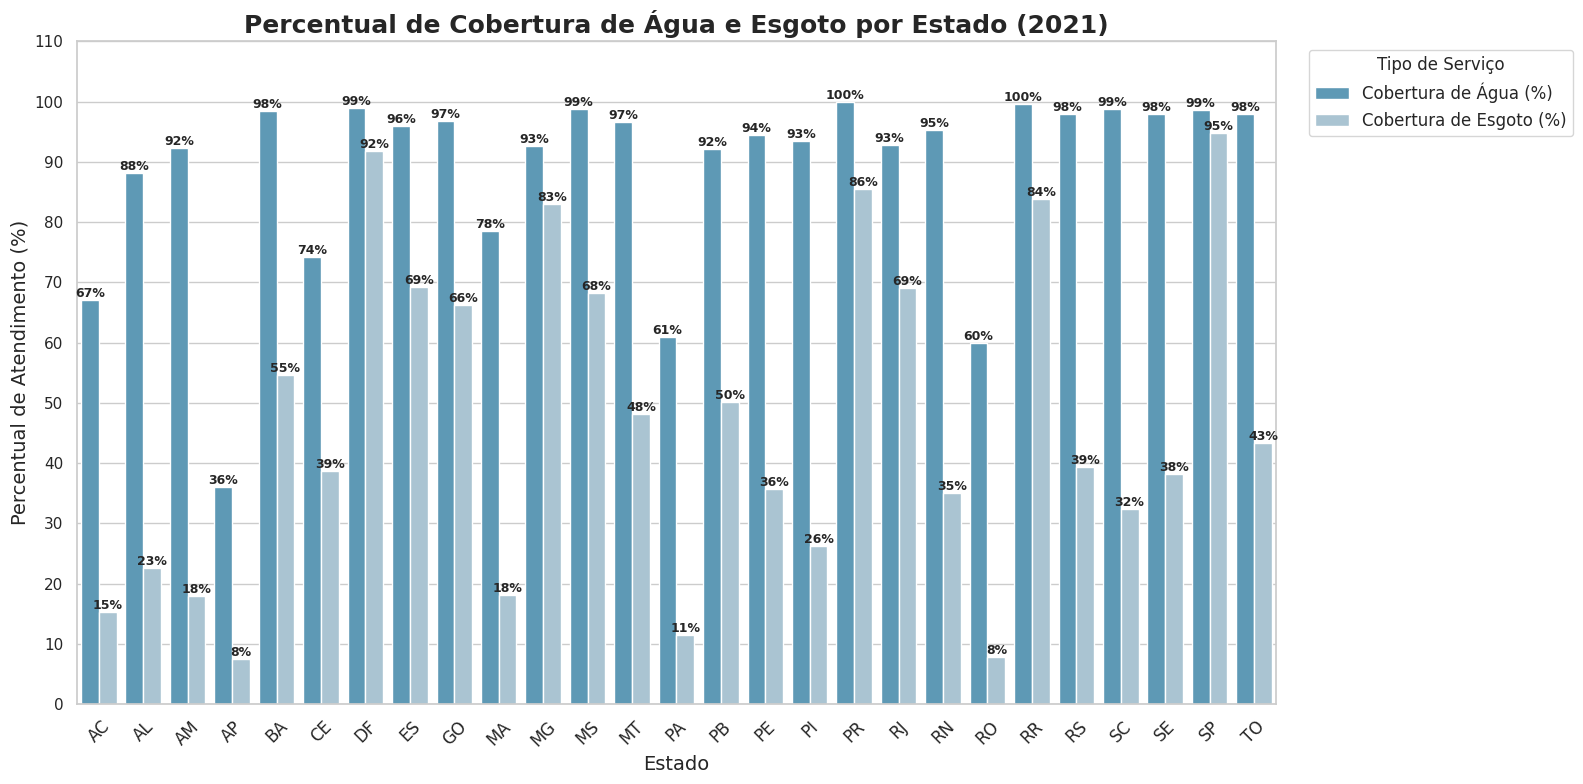

In [ ]:
# Filtra para o ano desejado (ex: 2021)
df_grafico = df_municipio_agua_esgoto_grouped[df_municipio_agua_esgoto_grouped['ano'] == 2021]

# Agrupa por UF
df_plot = df_grafico.groupby('sigla_uf')[['populacao_urbana', 'populacao_urbana_atendida_agua', 'populacao_urbana_atendida_esgoto']].sum().reset_index()

# Calcula percentuais
df_plot['perc_agua'] = (df_plot['populacao_urbana_atendida_agua'] / df_plot['populacao_urbana']) * 100
df_plot['perc_esgoto'] = (df_plot['populacao_urbana_atendida_esgoto'] / df_plot['populacao_urbana']) * 100

# Transforma para formato longo (para usar no seaborn)
df_plot_melted = df_plot.melt(
    id_vars='sigla_uf',
    value_vars=['perc_agua', 'perc_esgoto'],
    var_name='tipo_servico',
    value_name='percentual'
)

# Renomeia os rótulos
tipo_servico_map = {
    'perc_agua': 'Cobertura de Água (%)',
    'perc_esgoto': 'Cobertura de Esgoto (%)'
}

df_plot_melted['tipo_servico'] = df_plot_melted['tipo_servico'].map(tipo_servico_map)

# Plot
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

plt.figure(figsize=(16, 8))

palette = {'Cobertura de Água (%)': '#4f9ec4', 'Cobertura de Esgoto (%)': '#a3c6d9'}

# Gráfico de barras agrupadas
barplot = sns.barplot(
    data=df_plot_melted,
    x='sigla_uf',
    y='percentual',
    hue='tipo_servico',
    palette=palette
)

# Ajustes visuais
plt.title('Percentual de Cobertura de Água e Esgoto por Estado (2021)', fontsize=18, fontweight='bold')
plt.xlabel('Estado', fontsize=14)
plt.ylabel('Percentual de Atendimento (%)', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(range(0, 121, 10))
plt.legend(title='Tipo de Serviço', fontsize=12, bbox_to_anchor=(1.02, 1), loc='upper left')
plt.ylim(0, 110)
plt.tight_layout()

# Adiciona rótulos nas barras
for p in barplot.patches:
    height = p.get_height()
    if height > 0:
        barplot.annotate(f'{height:.0f}%',
                         (p.get_x() + p.get_width() / 2, height),
                         ha='center', va='bottom',
                         fontsize=9, fontweight='bold')

plt.show()


### **2. Top 5 Estados com maior percentual decobertura de água e Top 5 de cobertura de esgoto**

#### <a name="top5"></a> **Top 5 Estados na cobertura de água e Top 5 na cobertura de esgoto**

In [ ]:
top_5_agua = df_plot.nlargest(5, 'perc_agua')
top_5_esgoto = df_plot.nlargest(5, 'perc_esgoto')

df_top5 = pd.DataFrame({
    'Top 5 Água - UF': top_5_agua['sigla_uf'].values,
    'Cobertura Água (%)': top_5_agua['perc_agua'].values,
    'Top 5 Esgoto - UF': top_5_esgoto['sigla_uf'].values,
    'Cobertura Esgoto (%)': top_5_esgoto['perc_esgoto'].values
})

df_top5.style.format({
    'Cobertura Água (%)': "{:.2f}%",
    'Cobertura Esgoto (%)': "{:.2f}%"
}).set_caption("Top 5 estados em cobertura de água e esgoto")

,Top 5 Água - UF,Cobertura Água (%),Top 5 Esgoto - UF,Cobertura Esgoto (%)
0,PR,99.98%,SP,94.72%
1,RR,99.67%,DF,91.77%
2,DF,99.00%,PR,85.51%
3,MS,98.85%,RR,83.87%
4,SC,98.81%,MG,82.96%


### **3. Variação do investimento público ao longo dos anos por estado**


In [ ]:
df_municipio_agua_esgoto_uf_ano = df_municipio_agua_esgoto_grouped.groupby(['sigla_uf', 'ano'])[['populacao_urbana', 'populacao_urbana_atendida_agua', 'populacao_urbana_atendida_esgoto', 'investimento_total_estado', 'investimento_total_municipio']].sum()
df_municipio_agua_esgoto_uf_ano.head()

populacao_urbana  populacao_urbana_atendida_agua  \
sigla_uf ano                                                      
AC       2017            600692                          392907   
         2018            629627                          395995   
         2019            638685                          407817   
         2020            647646                          408743   
         2021            656513                          440582   

               populacao_urbana_atendida_esgoto  investimento_total_estado  \
sigla_uf ano                                                                 
AC       2017                             88770                46302519.92   
         2018                             87745                56380830.96   
         2019                             87950                21210701.89   
         2020                            101739                 9272630.80   
         2021                            100364                 3971089.25   

               investimento_total_municipio  
sigla_uf ano                                 
AC       2017                           0.0  
         2018                           0.0  
         2019                           0.0  
         2020                           0.0  
         2021                           0.0

In [ ]:
def format_unidade_reais(x):
    if pd.isna(x):
        return ""  # evita erro em valores NaN
    if x >= 1e9:
        return f'R$ {x/1e9:.1f} bi'
    elif x >= 1e6:
        return f'R$ {x/1e6:.1f} mi'
    elif x >= 1e3:
        return f'R$ {x/1e3:.0f} mil'
    else:
        return f'R$ {x:.0f}'

#### <a name="variacao-investimento"></a> **Variação de Investimento por Estado**

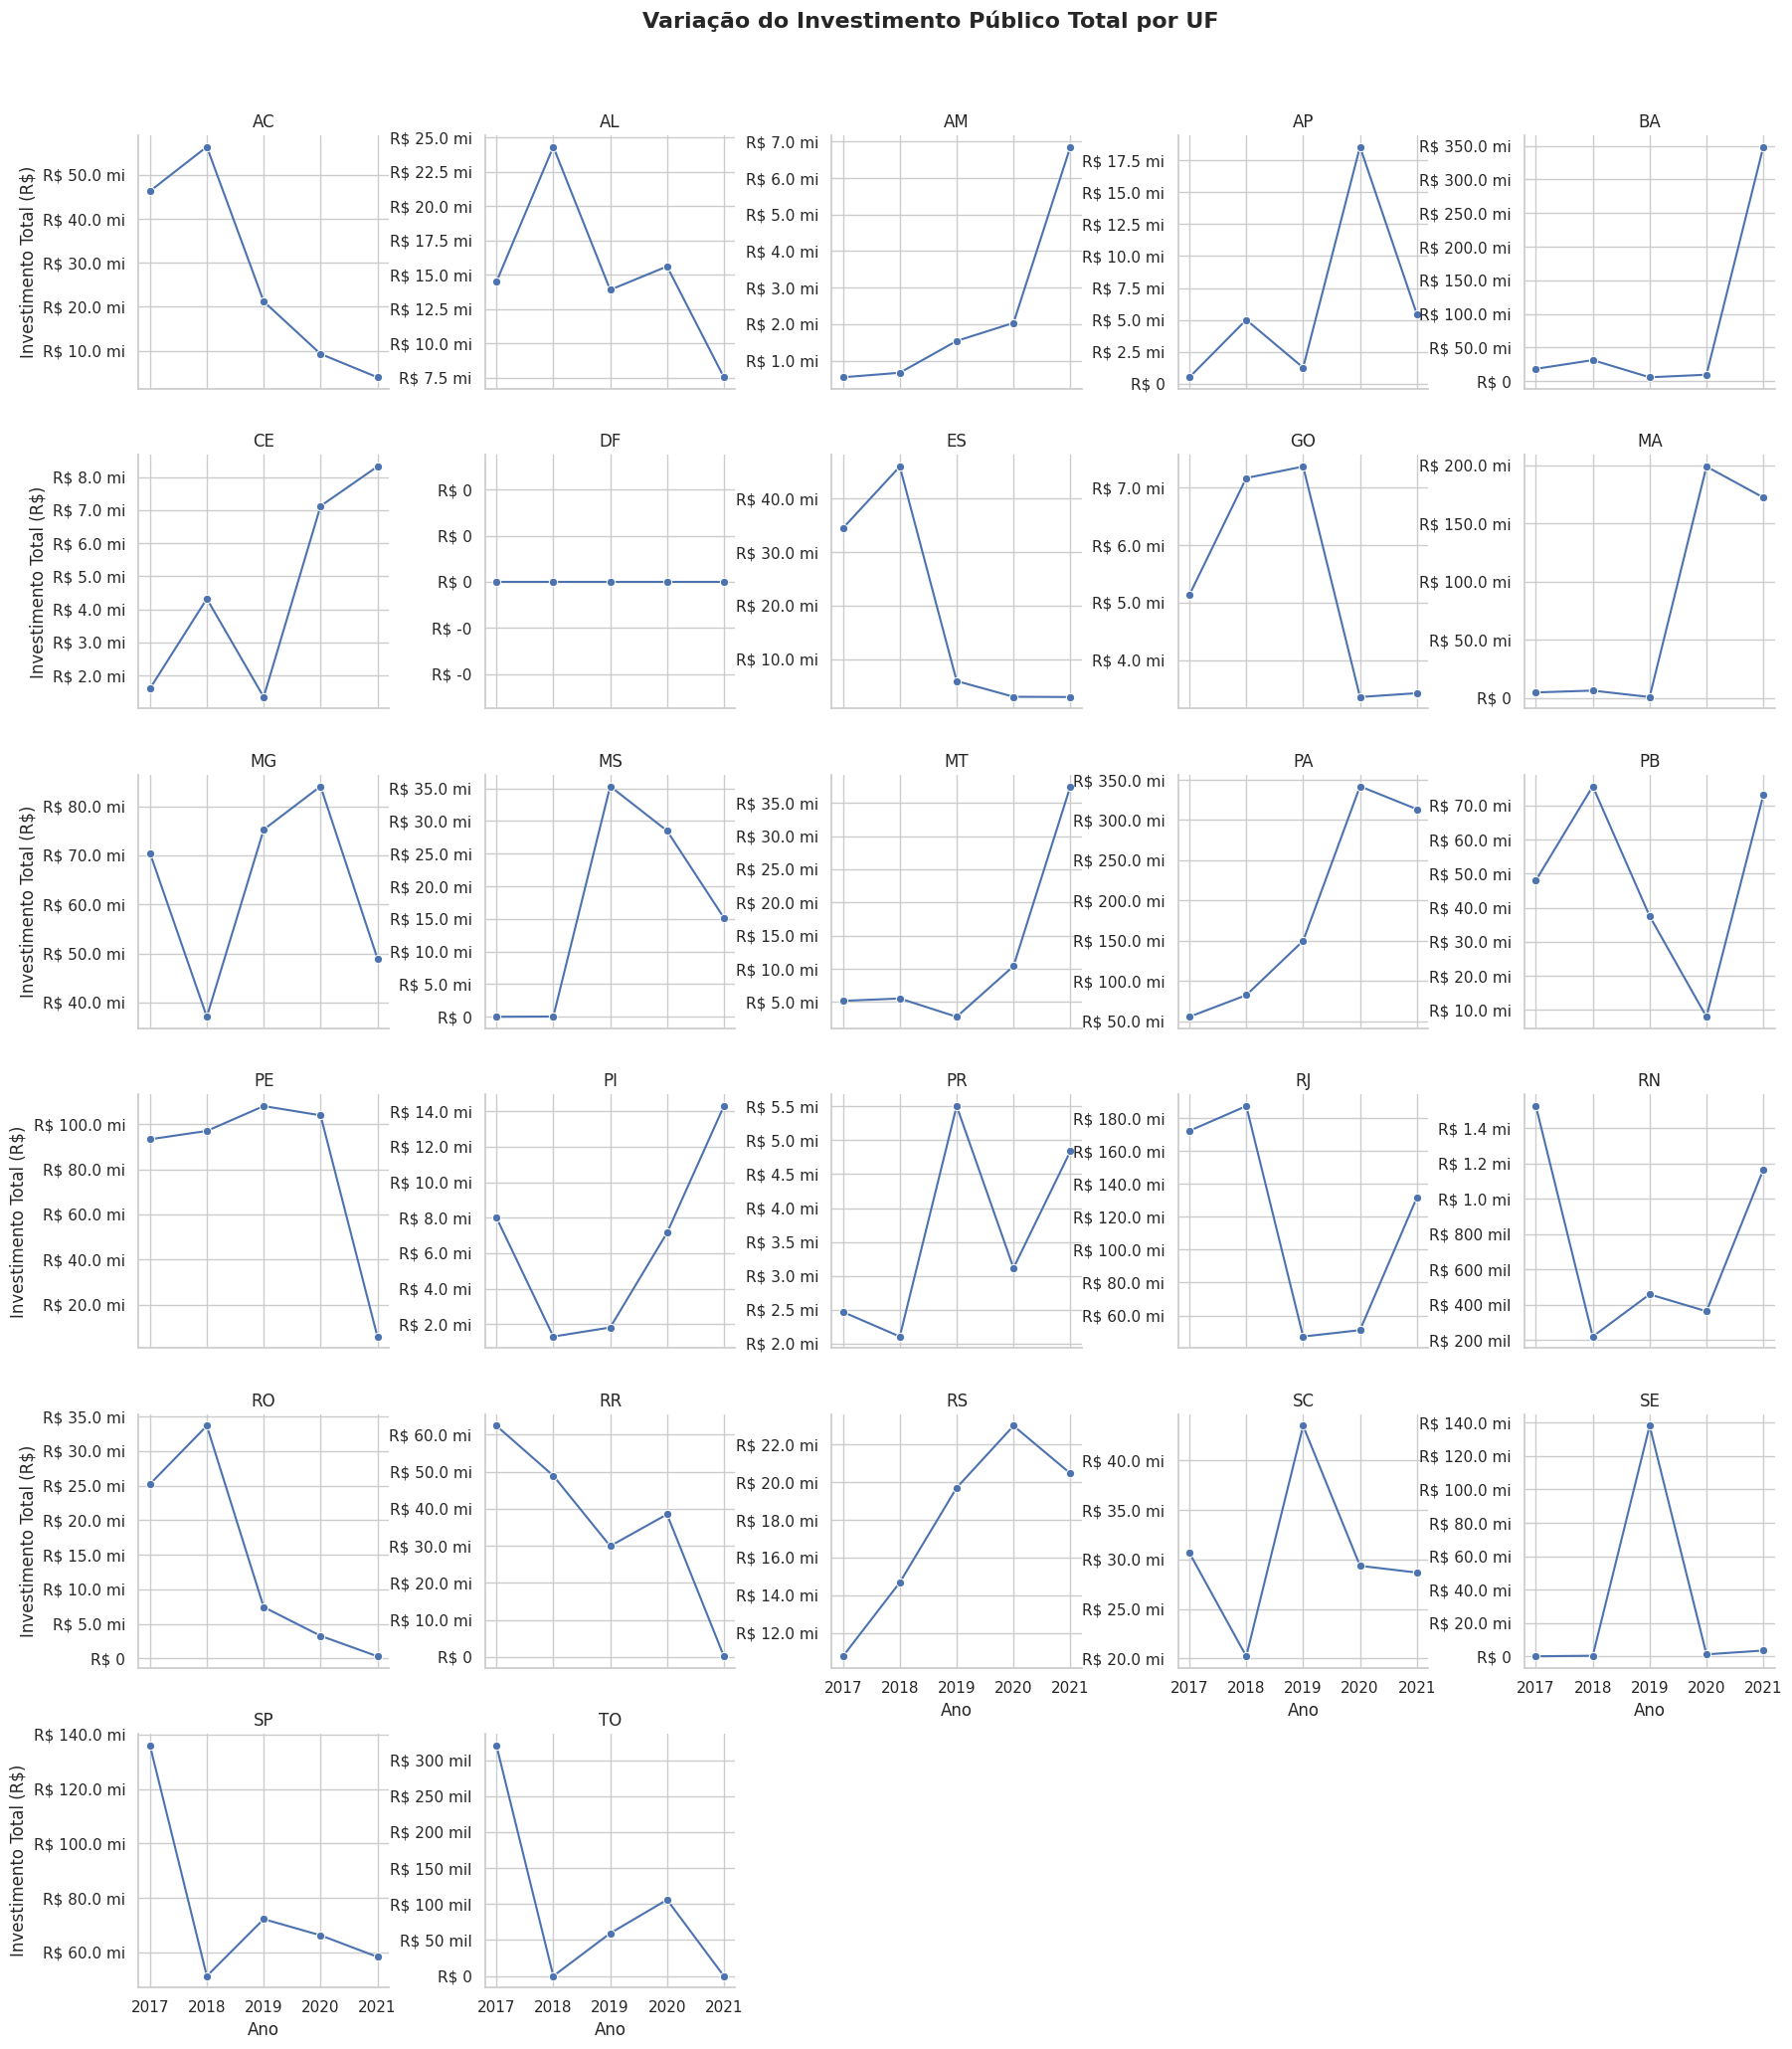

In [ ]:
# Prepara o dataframe
ddf_plot_2 = df_municipio_agua_esgoto_uf_ano.reset_index()
ddf_plot_2['investimento_total'] = ddf_plot_2['investimento_total_estado'] + ddf_plot_2['investimento_total_municipio']

# Gráfico de linha por UF
g = sns.FacetGrid(ddf_plot_2, col='sigla_uf', col_wrap=5, height=3.5, sharey=False)
g.map_dataframe(sns.lineplot, x='ano', y='investimento_total', marker='o')
g.set_titles(col_template="{col_name}")
g.set_axis_labels("Ano", "Investimento Total (R$)")
g.fig.suptitle('Variação do Investimento Público Total por UF', fontsize=16, fontweight='bold')
g.fig.tight_layout()
g.fig.subplots_adjust(top=0.92)

# Ajusta eixo Y com formato R$ mil / mi / bi
for ax in g.axes.flatten():
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: format_unidade_reais(x)))

plt.show()


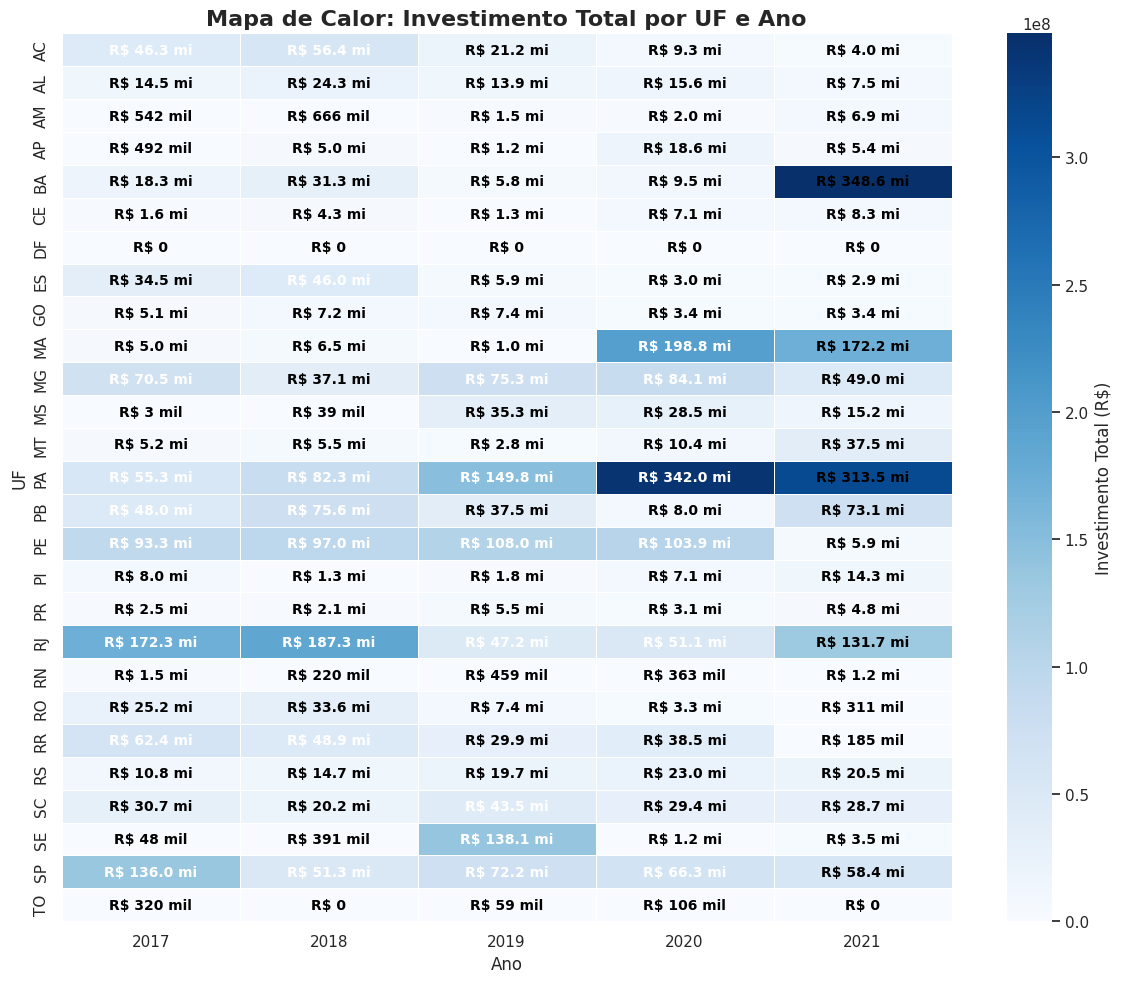

In [ ]:
# Prepara o dataframe para pivot
ddf_plot_2['investimento_total'] = ddf_plot_2['investimento_total_estado'] + ddf_plot_2['investimento_total_municipio']

df_pivot = ddf_plot_2.pivot(index='sigla_uf', columns='ano', values='investimento_total')

# Plot do heatmap
plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(
    df_pivot,
    annot=df_pivot.applymap(format_unidade_reais),  # valores formatados como texto
    fmt="",  # sem formato numérico
    cmap='Blues',
    linewidths=0.5,
    cbar_kws={'label': 'Investimento Total (R$)'}  # adiciona label na colorbar
)

# Título e eixos
plt.title('Mapa de Calor: Investimento Total por UF e Ano', fontsize=16, fontweight='bold')
plt.xlabel('Ano')
plt.ylabel('UF')

# para facilitar, cria matriz com as posições reais dos valores
for i, (y, row) in enumerate(df_pivot.iterrows()):
    for j, (x, val) in enumerate(row.items()):
        index = i * df_pivot.shape[1] + j

        text = heatmap.texts[index]
        text.set_fontsize(10)
        text.set_fontweight('bold')

        # definimos cor do texto com base no valor
        if val > 40_000_000:
            text.set_color('white')
        else:
            text.set_color('black')

    try:
        # tenta converter para número base (estimado)
        if 'bi' in text.get_text():
            num_val = float(text_value.replace('bi','')) * 1e9
        elif 'mi' in text.get_text():
            num_val = float(text_value.replace('mi','')) * 1e6
        elif 'mil' in text.get_text():
            num_val = float(text_value.replace('mil','')) * 1e3
        else:
            num_val = float(text_value)
    except:
        num_val = 0

    # Threshold (ajuste para o seu caso — você pode calibrar esse 40 milhões como quiser)
    if num_val > 40_000_000:
        text.set_color('white')
    else:
        text.set_color('black')

# Final layout
plt.tight_layout()
plt.show()

### **4. Qual a natureza jurídica mais recorrente de prestação desses serviços?**

In [ ]:
df_prestador_agua_esgoto_grouped = df_prestador_agua_esgoto.groupby(['sigla_uf', 'ano', 'id_municipio', 'id_prestador', 'prestador', 'sigla_prestador', 'abrangencia', 'tipo_servico', 'natureza_juridica']).sum() \
    .reset_index()

df_prestador_agua_esgoto_grouped.head()

,sigla_uf,ano,id_municipio,id_prestador,prestador,sigla_prestador,abrangencia,tipo_servico,natureza_juridica,id_municipio_nome,sigla_uf_nome
0,AC,2017,1200013,12004000,Departamento Estadual de Pavimentacao e Saneam...,DEPASA,Regional,Agua,Autarquia,Acrelândia,Acre
1,AC,2017,1200054,12004000,Departamento Estadual de Pavimentacao e Saneam...,DEPASA,Regional,Agua,Autarquia,Assis Brasil,Acre
2,AC,2017,1200104,12001011,Prefeitura Municipal de Brasileia,PMB,Local,Esgotos,Administracao publica direta,Brasiléia,Acre
3,AC,2017,1200104,12004000,Departamento Estadual de Pavimentacao e Saneam...,DEPASA,Regional,Agua,Autarquia,Brasiléia,Acre
4,AC,2017,1200138,12004000,Departamento Estadual de Pavimentacao e Saneam...,DEPASA,Regional,Agua,Autarquia,Bujari,Acre


In [ ]:
valores_unicos_ordenados = df_prestador_agua_esgoto['natureza_juridica'].drop_duplicates().sort_values().tolist()
valores_unicos_ordenados

['Administracao publica direta',
 'Autarquia',
 'Empresa privada',
 'Empresa publica',
 'Organizacao social',
 'Sociedade de economia mista com administracao publica']

Como na base não tenho uma coluna de região vou criar uma a partir da coluna `sigla_uf`. Pra isso, construo um dicionário que contem a região pra cada estado, assim ao curzar esse dicionário com a base eu vou olhar pra coluna `sigla_uf` e a partir da sigla do estado que tiver lá eu saberei a qual região esse estado pertence, com ajuda do método [map](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.map.html#pandas.DataFrame.map).

In [ ]:
uf_regiao_map = {
    'AC': 'Norte', 'AP': 'Norte', 'AM': 'Norte', 'PA': 'Norte', 'RO': 'Norte', 'RR': 'Norte', 'TO': 'Norte',
    'AL': 'Nordeste', 'BA': 'Nordeste', 'CE': 'Nordeste', 'MA': 'Nordeste', 'PB': 'Nordeste', 'PE': 'Nordeste',
    'PI': 'Nordeste', 'RN': 'Nordeste', 'SE': 'Nordeste',
    'DF': 'Centro-Oeste', 'GO': 'Centro-Oeste', 'MT': 'Centro-Oeste', 'MS': 'Centro-Oeste',
    'ES': 'Sudeste', 'MG': 'Sudeste', 'RJ': 'Sudeste', 'SP': 'Sudeste',
    'PR': 'Sul', 'RS': 'Sul', 'SC': 'Sul'
}

In [ ]:
df_prestador_agua_esgoto_regiao = df_prestador_agua_esgoto[df_prestador_agua_esgoto['ano'] == 2021]
df_prestador_agua_esgoto_regiao['regiao'] = df_prestador_agua_esgoto_regiao['sigla_uf'].map(uf_regiao_map)

df_contagem = df_prestador_agua_esgoto_regiao.drop_duplicates() \
    .groupby(['regiao', 'natureza_juridica'])['id_municipio'] \
    .nunique() \
    .reset_index() \
    .rename(columns={'id_municipio': 'qtd_municipios'})

df_contagem

# Total de municipios nessa ordenação = 5973 => é possível que haja municípios com duas ou mais gestões distintas

,regiao,natureza_juridica,qtd_municipios
0,Centro-Oeste,Administracao publica direta,70
1,Centro-Oeste,Autarquia,32
2,Centro-Oeste,Empresa privada,38
3,Centro-Oeste,Sociedade de economia mista com administracao ...,295
4,Nordeste,Administracao publica direta,309
5,Nordeste,Autarquia,107
6,Nordeste,Empresa privada,19
7,Nordeste,Empresa publica,1
8,Nordeste,Sociedade de economia mista com administracao ...,1492
9,Norte,Administracao publica direta,84


#### <a name="natureza-juridica-ultimo-ano"></a> **Natureza Juridica mais recorrente no ano de 2021**

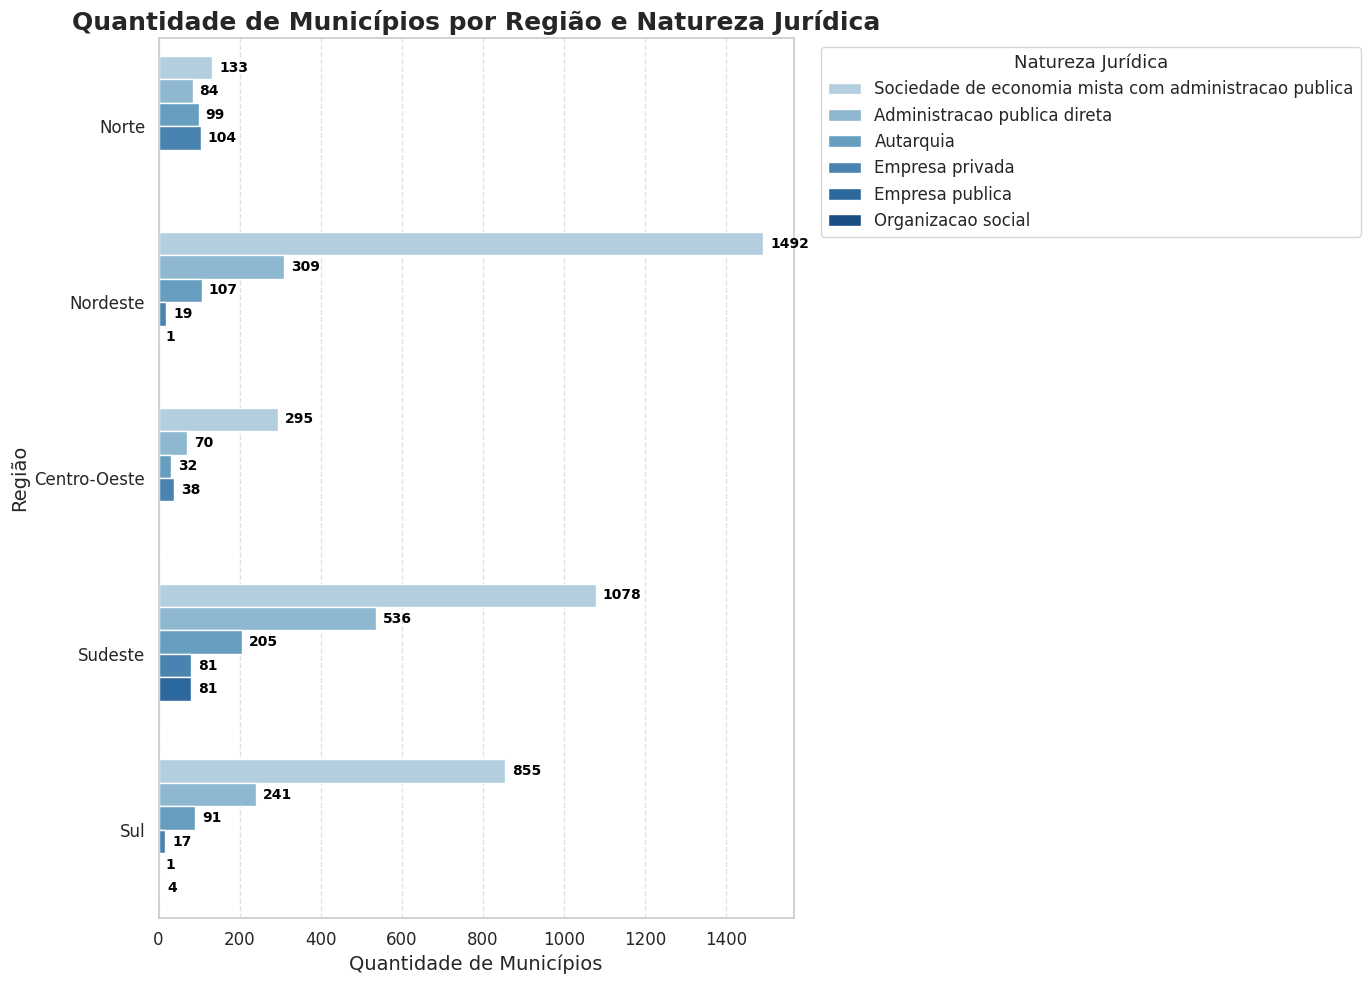

In [ ]:
ordem_regioes = ['Norte', 'Nordeste', 'Centro-Oeste', 'Sudeste', 'Sul']

# --- Ordenação automática das naturezas jurídicas ---
natureza_order = df_contagem.groupby('natureza_juridica')['qtd_municipios'].sum() \
    .sort_values(ascending=False) \
    .index.tolist()

# --- Paleta tons de azul ---
num_naturezas = len(natureza_order)
palette_blues = sns.color_palette("Blues", n_colors=num_naturezas + 2)[2:]

# --- Cria figura ---
plt.figure(figsize=(14, 10))
sns.set_theme(style="whitegrid")

# --- Gráfico de barras agrupadas HORIZONTAL ---
barplot = sns.barplot(
    data=df_contagem,
    y='regiao',
    x='qtd_municipios',
    hue='natureza_juridica',
    hue_order=natureza_order,
    palette=palette_blues,
    order=ordem_regioes
)

# --- Títulos e eixos ---
plt.title('Quantidade de Municípios por Região e Natureza Jurídica', fontsize=18, fontweight='bold')
plt.xlabel('Quantidade de Municípios', fontsize=14)
plt.ylabel('Região', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# --- Grade vertical (agora no eixo X) ---
barplot.xaxis.grid(True, linestyle='--', alpha=0.6)
barplot.yaxis.grid(False)

# --- Legenda ordenada ---
plt.legend(title='Natureza Jurídica', fontsize=12, title_fontsize=13, bbox_to_anchor=(1.03, 1), loc='upper left')

# --- Adiciona valores nas barras ---
for p in barplot.patches:
    largura = p.get_width()
    if largura > 0:
        barplot.annotate(
            f'{int(largura)}',
            (largura, p.get_y() + p.get_height() / 2),
            ha='left', va='center', fontsize=10, fontweight='bold', color='black', xytext=(5, 0), textcoords='offset points'
        )

plt.tight_layout()

plt.show()


#### Há municípios onde os serviços de água/esgoto são geridos por 2 ou mais instituições de natureza jurídica distintas

In [ ]:
df_prestador_agua_esgoto['id_municipio'].nunique()
# Total de municípios no Brasil = 5570

5448

In [ ]:
municipios_multiplas_naturezas = df_prestador_agua_esgoto_grouped.groupby(['ano', 'id_municipio']).filter(lambda x: x['natureza_juridica'].nunique() > 1)

print("Municípios com naturezas jurídicas distintas por ano:")
display(municipios_multiplas_naturezas[['ano', 'sigla_uf', 'id_municipio', 'id_municipio_nome', 'natureza_juridica']].drop_duplicates().sort_values(['ano', 'sigla_uf', 'id_municipio_nome']))


Municípios com naturezas jurídicas distintas por ano:


,ano,sigla_uf,id_municipio,id_municipio_nome,natureza_juridica
2,2017,AC,1200104,Brasiléia,Administracao publica direta
3,2017,AC,1200104,Brasiléia,Autarquia
130,2017,AL,2701407,Campo Alegre,Administracao publica direta
131,2017,AL,2701407,Campo Alegre,Sociedade de economia mista com administracao ...
180,2017,AL,2706406,Pão de Açúcar,Sociedade de economia mista com administracao ...
...,...,...,...,...,...
25065,2021,SE,2807501,Tomar do Geru,Administracao publica direta
27901,2021,SP,3529401,Mauá,Empresa privada
27902,2021,SP,3529401,Mauá,Sociedade de economia mista com administracao ...
28074,2021,SP,3545209,Salto,Autarquia


### **5. Tendência de natureza jurídica de instituições gestoras de serviços de água/esgoto nos últimos 5 anos**

#### <a name="natureza-juridica-ultimos-5-anos"></a> **Tendencia de natureza juridica nos últimos 5 anos**

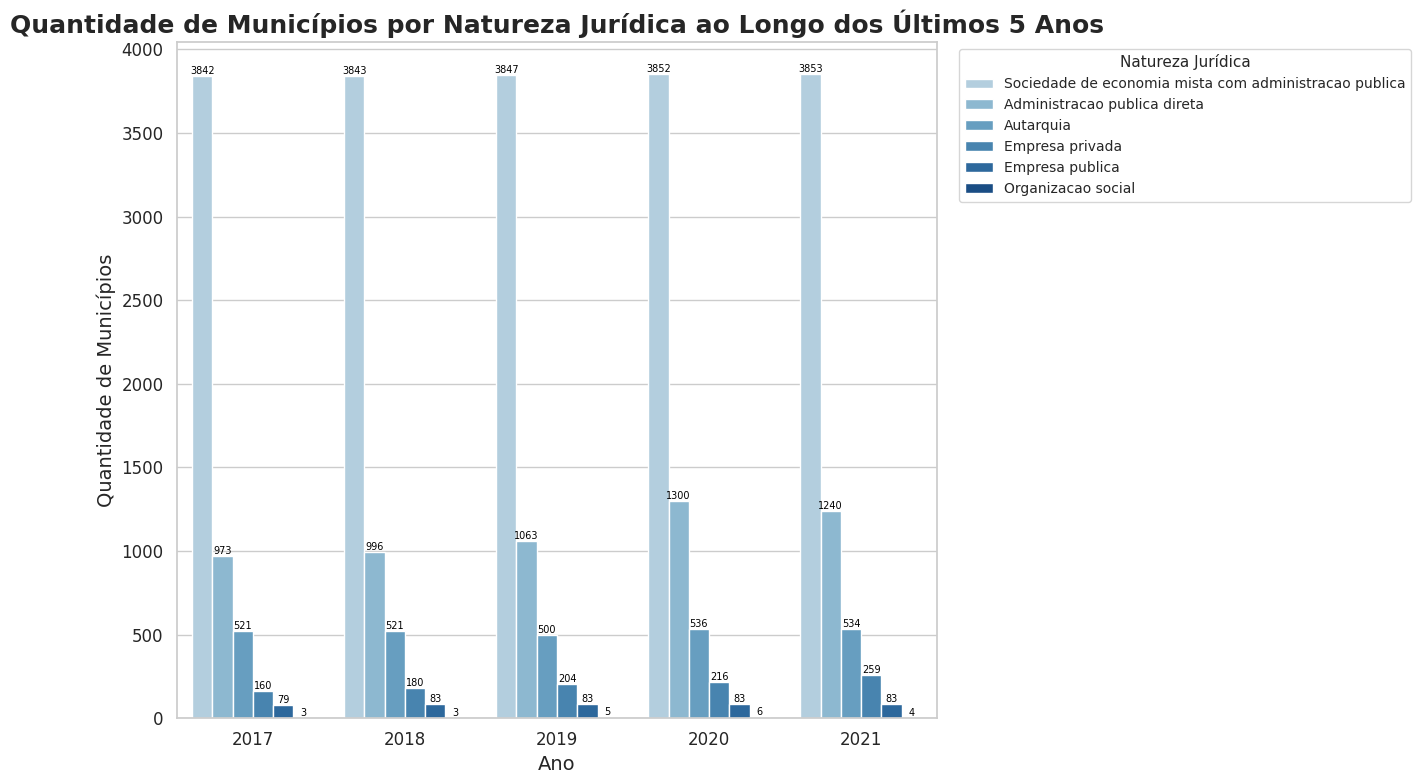

In [ ]:
# Conta a quantidade de municípios por natureza jurídica e ano
df_contagem_ano_natureza = df_prestador_agua_esgoto.groupby(['ano', 'natureza_juridica'])['id_municipio'].nunique().reset_index()
df_contagem_ano_natureza = df_contagem_ano_natureza.rename(columns={'id_municipio': 'qtd_municipios'})

# Ordena as naturezas jurídicas pela contagem total para melhor visualização no gráfico
natureza_order_ano = df_contagem_ano_natureza.groupby('natureza_juridica')['qtd_municipios'].sum().sort_values(ascending=False).index.tolist()

# Cria figura
plt.figure(figsize=(16, 8))
sns.set_theme(style="whitegrid")

# Gráfico de barras agrupadas por ano e natureza jurídica
barplot_ano = sns.barplot(
    data=df_contagem_ano_natureza,
    x='ano',
    y='qtd_municipios',
    hue='natureza_juridica',
    hue_order=natureza_order_ano,
    palette=sns.color_palette("Blues", n_colors=num_naturezas + 2)[2:]
)

# Títulos e eixos
plt.title('Quantidade de Municípios por Natureza Jurídica ao Longo dos Últimos 5 Anos', fontsize=18, fontweight='bold')
plt.xlabel('Ano', fontsize=14)
plt.ylabel('Quantidade de Municípios', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Legenda
plt.legend(title='Natureza Jurídica', fontsize=10, title_fontsize=11, bbox_to_anchor=(1.02, 1), loc='upper left')

# Adiciona valores nas barras
for p in barplot_ano.patches:
     height = p.get_height()
     if height > 0:
         barplot_ano.annotate(
             f'{int(height)}',
             (p.get_x() + p.get_width() / 2., height),
             ha='center', va='bottom', fontsize=7, color='black'
         )

plt.tight_layout(rect=[0, 0, 0.85, 1])

plt.show()


### **6. Como os indicadores de saneamento se correlacionam com índices de saúde (ex.: incidência de doenças)**

Para responder essa questão o primeiro ponto foi entender a implicação da falta de saneamento básico na saúde da população. Segundo a OMS:
> A falta de saneamento básico facilita a propagação de doenças, principalmente entre os mais jovens. De acordo com a OMS (Organização Mundial da Saúde), 1,7 milhão de crianças de até 5 anos morrem anualmente em ambientes considerados insalubres. As causas são poluição do ar, contaminação da água, falta de higiene e saneamento básico. (Fonte: [Habitat Brasil](https://habitatbrasil.org.br/doencas-falta-de-saneamento-basico/))

Para buscar uma correlação entre saneamento básico e incidência de doenças, escolhemos observar a ocorrência das principais doenças relacionadas ao saneamento básico:

>Diarreia, Amebíase, Amebiase, Cólera, Leptospirose, Disenteria, Hepatite A, Esquistossomose, Tifoide, Dengue, Febre Amarela, Malaria

Para a análise dessa doenças utilizamos os dados da base [Sistema de Informações Hospitalares do SUS (SIH/SUS)](https://basedosdados.org/dataset/ff933265-8b61-4458-877a-173b3f38102b?table=74f616d0-933c-4198-9f8e-00858eff807d).

Na base de Serviços Profissionais coletamos os campos `ano`, `sigla_uf`, `sigla_uf_nome` e `id_municipio_paciente`. Esses dados serviram apenas para identificar os casos por estado.

Na segunda base, AIH's Reduzidas, coletamos informações relacionadas às doenças e outras que serviriam de chave para cruzar com a primeira base: `ano`, `id_municipio_estabelecimento`, `id_municipio_gestor`, `id_municipio_gestor_nome`, `id_municipio_paciente`, `cep_paciente`, `cid_notificacao_subcategoria`, `cid_notificacao_subcategoria_descricao_subcategoria`, `cid_notificacao_subcategoria_descricao_categoria`, `cid_notificacao_subcategoria_descricao_capitulo`, `cid_causa_subcategoria`, `cid_causa_subcategoria_descricao_subcategoria`, `cid_causa_subcategoria_descricao_categoria`, `cid_causa_subcategoria_descricao_capitulo`, `cid_principal_subcategoria`, `cid_principal_subcategoria_descricao_subcategoria`, `cid_principal_subcategoria_descricao_categoria`, `cid_principal_subcategoria_descricao_capitulo`

Nessa base, fizemos um filtro apenas para coletar diagnósticos cuja **causa principal (CID 10) mencionassem as doenças acima** no **ano de 2021**, pois a base possui uma quantidade expressiva de dados.

**Problema enfrentado:**

Na base do SUS há pelo menos 2 IDs de município, um relacionado ao local de atendimento (hospital ou posto de atendimento) e outro relacionado a residência da pessoa/paciente, optamos por utilizar o id_municipio_paciente, por entendermos que o local de moradia é mais informativo nesse ponto do que o local de atendimento, superando assim casos onde a população busca auxilio médico em um local diferente da sua residência.

#### **Contabilizando casos por município**

In [ ]:
casos_por_municipio = df_aihs.groupby('id_municipio_paciente').size().reset_index(name='quantidade_casos')
casos_por_municipio = casos_por_municipio.sort_values(by='quantidade_casos', ascending=False)
casos_por_municipio

,id_municipio_paciente,quantidade_casos
1170,355030,211
495,261160,185
121,150670,132
1694,530010,86
688,310620,85
...,...,...
1674,521710,1
24,120030,1
20,120001,1
19,110180,1


In [ ]:
casos_por_municipio['id_municipio_paciente'] = casos_por_municipio['id_municipio_paciente'].astype(int)
df_aihs_municipio['id_municipio_paciente'] = df_aihs_municipio['id_municipio_paciente'].astype(int)

O cruzamento da duas bases estava dando ambiguidade na chave do merge e os municípios estavam caindo no estado errado, por isso o código abaixo e não apenas um simples merge de dataframes.

In [ ]:
# 1. Descobrir a UF mais frequente por município
uf_mais_comum = (
    df_aihs_municipio
    .groupby(['id_municipio_paciente', 'sigla_uf', 'sigla_uf_nome'])
    .size()
    .reset_index(name='frequencia')
    .sort_values(['id_municipio_paciente', 'frequencia'], ascending=[True, False])
    .drop_duplicates(subset='id_municipio_paciente', keep='first')
)

# 2. Fazer merge com casos_por_municipio sem gerar duplicação
df_resultado = pd.merge(
    casos_por_municipio,
    uf_mais_comum.drop(columns='frequencia'),
    on='id_municipio_paciente',
    how='left'
)


In [ ]:
df_resultado

,id_municipio_paciente,quantidade_casos,sigla_uf,sigla_uf_nome
0,355030,211,AC,Acre
1,261160,185,AC,Acre
2,150670,132,AM,Amazonas
3,530010,86,AC,Acre
4,310620,85,AC,Acre
...,...,...,...,...
1690,521710,1,DF,Distrito Federal
1691,120030,1,AC,Acre
1692,120001,1,AC,Acre
1693,110180,1,ES,Espírito Santo


#### <a name="doencas-por-estado"></a> **Número de doenças ocasionadas por falta de saneamento básico**

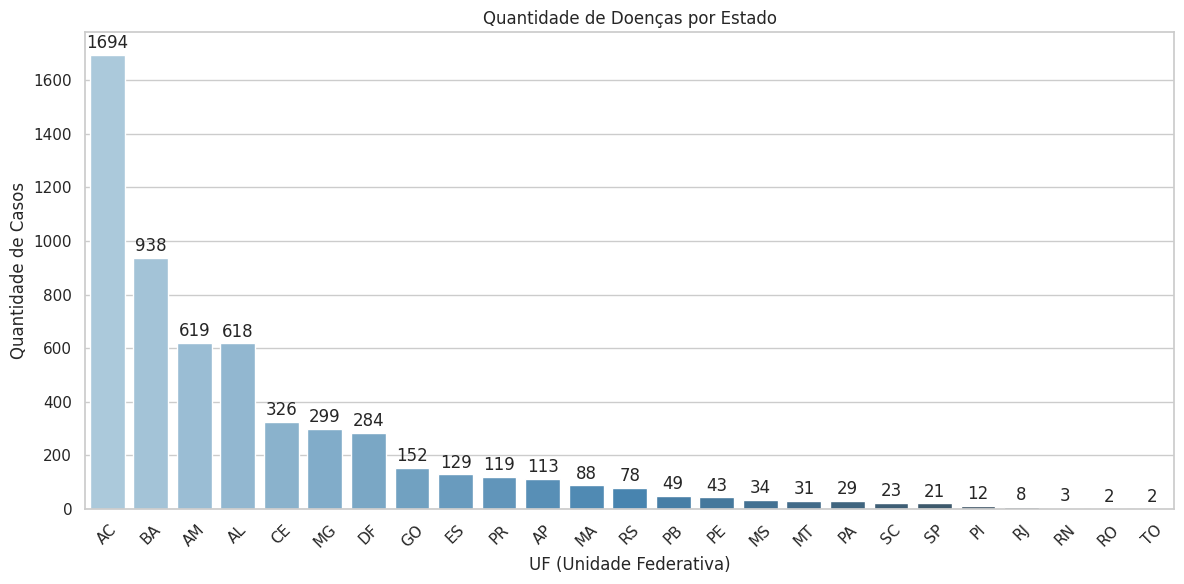

In [ ]:
# Agrupar por estado e somar os casos
casos_por_estado = df_resultado.groupby('sigla_uf', as_index=False)['quantidade_casos'].sum()
casos_por_estado = casos_por_estado.sort_values('quantidade_casos', ascending=False)

# Estilo do seaborn
sns.set(style='whitegrid')

# Criar gráfico
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=casos_por_estado,
    x='sigla_uf',
    y='quantidade_casos',
    palette='Blues_d'
)

# Adicionar rótulos de valores nas barras
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge', padding=2)

# Títulos e labels
plt.title('Quantidade de Doenças por Estado')
plt.xlabel('UF (Unidade Federativa)')
plt.ylabel('Quantidade de Casos')
plt.xticks(rotation=45)

# Layout e salvar como imagem
plt.tight_layout()
plt.savefig('quantidade_doencas_por_estado.png', dpi=300)
plt.show()


Comparando o gráfico acima com os 5 piores índices de cobertura de água e esgoto, percebemos que quanto menor a cobertura de saneamento báico maior o número de doenças associadas a falta desse serviço.

In [ ]:
# Seleciona os 5 estados com menor cobertura de água e esgoto
bottom_5_agua = df_plot.nsmallest(5, 'perc_agua')
bottom_5_esgoto = df_plot.nsmallest(5, 'perc_esgoto')

# Cria DataFrame com os piores 5 de cada caso
df_bottom5 = pd.DataFrame({
    'Piores 5 Água - UF': bottom_5_agua['sigla_uf'].values,
    'Cobertura Água (%)': bottom_5_agua['perc_agua'].values,
    'Piores 5 Esgoto - UF': bottom_5_esgoto['sigla_uf'].values,
    'Cobertura Esgoto (%)': bottom_5_esgoto['perc_esgoto'].values
})

# Estiliza a tabela
df_bottom5.style.format({
    'Cobertura Água (%)': "{:.2f}%",
    'Cobertura Esgoto (%)': "{:.2f}%"
}).set_caption("Piores 5 estados em cobertura de água e esgoto")

,Piores 5 Água - UF,Cobertura Água (%),Piores 5 Esgoto - UF,Cobertura Esgoto (%)
0,AP,36.00%,AP,7.57%
1,RO,59.89%,RO,7.88%
2,PA,60.90%,PA,11.44%
3,AC,67.11%,AC,15.29%
4,CE,74.26%,AM,18.05%


## **Perguntas e Respostas:**

**1. Qual é a cobertura de acesso à água potável e esgotamento sanitário nos estados brasileiros nos últimos 5 anos?**

> Visto que ao longo dos anos a cobertura de água e esgoto são incrementais, optamos por observar apenas o último ano e é exatamente essa visão que [esse gráfico demonstra](#cobertura-agua-esgoto)

**2. Top 5 Estados de cobertura de água e Top 5 de cobertura de esgoto.**

> Lista dos 5 estados que possuem maior porcentagem de cobertura de água e lista dos 5 estados que possuem melhor cobertura de esgoto, o cálculo foi realizado com base na população urbana. Logo, não está sendo considerada nessa análise a população rural. [Veja a tabela clicando aqui](#top5)

**3. Variação de investimento público ao longo dos anos por estado**

> A variação de investimento foi diversificada, não há uma tendencia que represente todos os estados.
> - Apenas o Distrito Federal manteve o orçamento estável e constante.
> - Estados como Acre, Alagoas, Espírito Santo, Goiás, Pernmbuco, Rondônia, Roraima, São Paulo e Tocantins tem diminuído de forma expressiva o investimento ao longo dos anos.
> - Já os Estados Amazonas, Bahia, Ceará, Maranhão, Mato Grosso, Pará, Piauí e Rio Grande do Sul ao contrário dos anteriores apresentam um crescimento de orçamento ao longo desse anos.
> - Os demais: Amapá, Minas Gerais, Mato Grosso do Sul, Paraíba, Paraná, Rio de Janeiro, Rio Grande do Norte, Santa Catarina e Sergipe, tem sido bastante inconstantes ao longo dos anos e segue entre aumento e decréscimo de orçamento de forma contínua.
> [Veja os gráficos por Estado clicando aqui](#variacao-investimento)

**4. Qual a natureza jurídica mais recorrente de prestação desses serviços por região?**

> Em tempos onde a privatização de serviços básicos tem sido constante focamos em observar como a gestão desses serviços tem sido conduzida a nível regional. Deste modo, cabe pontuar que a gestão compartilhada, Sociedade de economia mista com administracao publica, tem liderado a gestão desses serviços em todas as regiões, em seguida gestão pública direta ainda segue firme na condução desses serviços, contabilizando a Administracao publica direta, Autarquia e Empresa publica. [O resultado pode ser observado aqui](#natureza-juridica-ultimo-ano)

**5. Tendência de natureza jurídica de instituições gestoras de serviços de água/esgoto nos últimos 5 anos**

> Essa questão segue em linha com a anterior, porém tem como objetivo verificar quantitativamente como a privatização de serviçoes básicos como a gestão de água e esgoto tem se apresentado ao longo dos últimos cinco anos analisados. E percebemos que o cenário apresentado na questão anterior não tenha divergido de forma expressiva dos anos anteriores. [O resultado pode ser observado aqui](#natureza-juridica-ultimos-5-anos)

**6. Como os indicadores de saneamento se correlacionam com índices de saúde (ex.: incidência de doenças)?**

> Essa última questão buscou responder sobre a influência da falta de saneamento básico na saúde da população local. Ainda que tenhamos percebido uma correlação relevante com o Estado do Acre que lidera o número de doenças associadas a falta desses serviços e apresenta baixos indices de cobertura de água e esgoto. Olhar para apenas um ano e para as variáveis analisadas, pareceu não ser suficiente para entender essa questão, visto que não houve uma correlação tão direta com os demais estados que lideram o ranking das doenças observadas. Seria o caso de observar mais doenças? Deveríamos observar dados de saneamento de anos anteriores, pois surtos de doenças demoram um pouco mais para serem observáveis nos dados?.[O resultado pode ser observado aqui](#doencas-por-estado)

## **Fontes Utilizadas:**
1. Dados sobre o saneamento básico no país - [Base de Dados do SNIS](https://basedosdados.org/dataset/2a543ad8-3cdb-4047-9498-efe7fb8ed697?table=df7cf198-4889-4baf-bb77-4e0e28eb90ca)
2. Dados de informações de causas de internação usada para levantamento de doenças ocasionadas por falta de saneamento básico - [Base de Informações Hospitalares do SUS](https://basedosdados.org/dataset/ff933265-8b61-4458-877a-173b3f38102b?table=74f616d0-933c-4198-9f8e-00858eff807d)
3. Tutorial de vinculação do Big Query ao Google Colab - [Notebook com exemplo e orientações de conexão Colab e Big Query](https://colab.research.google.com/drive/1_DeLAGUiC3SFOahmwpyF5iBtJZ6rzttA?usp=sharing)
4. Documentação da plataforma Base de Dados sobre uso dos dados no Big Query - [Documentação BD sobre conexão com Big Query](https://basedosdados.org/docs/home#acessando-tabelas-tratadas-bd)
5. Matéria sobre as principais doenças ocasionadas por falta de saneamento básico - [Doenças por falta de saneamento básico - Habitat Brasil](https://habitatbrasil.org.br/doencas-falta-de-saneamento-basico/)
